# AI-Powered Brain Tumor Classification: Advanced MRI Analysis with CNNs

This notebook demonstrates how **Artificial Intelligence (AI)** and **Deep Learning** can revolutionize the detection and classification of brain tumors from MRI images. Using **Convolutional Neural Networks (CNNs)** and **Transfer Learning (TL)**, we aim to tackle the complexities of brain tumor diagnosis with a highly accurate and automated approach.

## Context
Brain tumors are among the most aggressive and complex diseases, presenting significant challenges in diagnosis due to variations in size, shape, and location. Manual examination of MRI scans is not only time-consuming but also prone to errors, especially in regions with limited access to skilled radiologists and neurosurgeons. By leveraging state-of-the-art AI techniques, this notebook seeks to overcome these challenges, providing a scalable and efficient solution for medical professionals worldwide.

## Objectives
- **Detect and classify brain tumors** into four distinct classes using CNNs and Transfer Learning.
- **Address the diagnostic challenges** posed by tumor variability and resource constraints.
- **Provide the foundation** for a cloud-based automated diagnostic system to support healthcare practitioners.

## Key Highlights
- **Dataset**: A curated MRI dataset for brain tumor classification, acknowledging contributions from Navoneel Chakrabarty and Swati Kanchan.
- **Techniques Used**: Deep Learning methods, including CNNs and Transfer Learning, to optimize classification accuracy.
- **Goal**: Build a robust and reliable AI model that enhances diagnostic efficiency and accuracy.

## Team Acknowledgements
This work is inspired by the contributions of:
- Sartaj Bhuvaji  
- Ankita Kadam  
- Prajakta Bhumkar  
- Sameer Dedge  

Special thanks to the open-source community for providing datasets and resources that enable advancements in medical AI.

---

By automating MRI analysis with cutting-edge AI technologies, this notebook aims to support faster, more reliable diagnostic processes, ultimately contributing to improved patient care and outcomes.


## Libraries and Tools Used  

This project leverages a range of Python libraries and tools for data manipulation, visualization, image processing, and building a robust Deep Learning pipeline. Below is an overview of the purpose of each library or module imported:  

- **`matplotlib.pyplot`**: A comprehensive library for creating static, animated, and interactive visualizations to plot data insights and results.  
- **`numpy`**: A powerful numerical computing library used for handling arrays and performing mathematical operations efficiently.  
- **`pandas`**: Essential for data manipulation and analysis, providing DataFrame structures for handling tabular data.  
- **`seaborn`**: Built on Matplotlib, it simplifies the creation of informative and attractive statistical graphics.  
- **`cv2` (OpenCV)**: A computer vision library used here for image preprocessing, including resizing, augmentations, and other transformations.  
- **`tensorflow`**: A core deep learning framework used for building and training neural networks, including image classification models.  
- **`ImageDataGenerator`**: A TensorFlow utility for augmenting image datasets to improve model generalization.  
- **`tqdm`**: Provides progress bars to track the status of loops and iterations for enhanced user experience.  
- **`os`**: A standard library for interacting with the operating system, used for file and directory management.  
- **`sklearn` (scikit-learn)**: Provides utilities like dataset shuffling, train-test splitting, and metrics for evaluating model performance.  
- **`EfficientNetB0`**: A pre-trained model from TensorFlow's applications module, used for Transfer Learning in this project.  
- **`EarlyStopping`, `ReduceLROnPlateau`, `TensorBoard`, `ModelCheckpoint`**: TensorFlow callbacks to enhance training by preventing overfitting, reducing learning rates, monitoring progress, and saving the best models.  
- **`classification_report`, `confusion_matrix`**: Evaluation tools from scikit-learn for analyzing model performance and generating detailed metrics.  
- **`ipywidgets`**: Used for creating interactive widgets within Jupyter notebooks, enhancing the user experience.  
- **`io` and `PIL.Image`**: Utilities for handling image input and processing.  
- **`IPython.display`**: Used for rendering rich outputs like images or clearing notebook outputs dynamically.  
- **`warnings`**: To filter and suppress unnecessary warnings, ensuring a clean and focused workflow.  

These tools work together to streamline the data analysis, preprocessing, model training, and evaluation process, ensuring efficient and reproducible results.  


In [20]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm
import os
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from sklearn.metrics import classification_report,confusion_matrix
import ipywidgets as widgets
import io
from PIL import Image
from IPython.display import display,clear_output
from warnings import filterwarnings

## Exploring and Extracting Dataset Files  

To work with the dataset, the first step is to ensure that the data files are accessible. The following code iterates through the directory structure to list all the files contained within a specified archive. Additionally, if the dataset is provided in a compressed format, such as `.zip`, it will be extracted automatically for easier access.  

### Key Steps:  
1. **Check and Extract**: If the dataset is provided as a compressed file (`brain_tumor_dataset.zip`), the script will extract it into the working directory using the `zipfile` module.  
2. **List Files**: The `os.walk()` function is then used to traverse the directory structure, printing the full path of each file for verification.

In [21]:
import os
import zipfile

# Specify the path to the compressed archive
archive_path = 'brain_tumor_dataset.zip'

# Check if the file is a zip and extract it
if os.path.exists(archive_path) and zipfile.is_zipfile(archive_path):
    with zipfile.ZipFile(archive_path, 'r') as zip_ref:
        print("Extracting files...")
        zip_ref.extractall()
        print("Extraction complete!")

# Walk through the extracted directory and list all files
for dirname, _, filenames in os.walk('.'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Extracting files...
Extraction complete!
./effnet.keras
./brain_tumor_dataset.zip
./.config/hidden_gcloud_config_universe_descriptor_data_cache_configs.db
./.config/active_config
./.config/.last_opt_in_prompt.yaml
./.config/default_configs.db
./.config/.last_survey_prompt.yaml
./.config/.last_update_check.json
./.config/config_sentinel
./.config/gce
./.config/logs/2025.01.09/14.23.45.755949.log
./.config/logs/2025.01.09/14.24.30.432184.log
./.config/logs/2025.01.09/14.24.19.246185.log
./.config/logs/2025.01.09/14.24.31.105470.log
./.config/logs/2025.01.09/14.24.17.896417.log
./.config/logs/2025.01.09/14.24.06.954373.log
./.config/configurations/config_default
./Testing/meningioma_tumor/image(77).jpg
./Testing/meningioma_tumor/image(1).jpg
./Testing/meningioma_tumor/image(69).jpg
./Testing/meningioma_tumor/image(12).jpg
./Testing/meningioma_tumor/image(76).jpg
./Testing/meningioma_tumor/image(74).jpg
./Testing/meningioma_tumor/image(97).jpg
./Testing/meningioma_tumor/image(120).jpg
./Te

* **zipfile.ZipFile:** This module is used to handle .zip files. The script checks if the specified file is a valid zip archive and extracts its contents if needed.
* **os.walk():** Recursively walks through the directory and subdirectories, providing access to directory names and filenames.
* **Dynamic Extraction:** Automatically extracts the archive if it hasn't been done previously, ensuring that the dataset is ready for use.
This approach ensures that the dataset is both unpacked (if compressed) and verified, providing a clear list of available files for subsequent processing.

## Custom Color Palettes  

This project incorporates custom color palettes to enhance the visual appeal and consistency of data visualizations. These palettes are designed with specific hex color codes and cater to different thematic purposes:  

- **Dark Palette**: A range of grayscale tones, ideal for creating neutral or minimalist visuals.  
- **Red Palette**: A gradient of red hues, often used to highlight critical or warning-related information.  
- **Green Palette**: A spectrum of green shades, symbolizing positive outcomes or healthy states.  

### Purpose and Visualization  
The defined palettes provide a cohesive and thematic color scheme across the project. By using visualization tools, these palettes are previewed to ensure they complement the overall design and improve interpretability.  

### Benefits  
1. **Consistency**: Applying the same palettes across all visualizations creates a uniform and professional look.  
2. **Clarity**: Carefully selected colors enhance the readability and impact of charts and graphs.  
3. **Customizability**: The use of hex codes allows precise control over color selection, ensuring the palettes align with the project's requirements.  

Custom palettes not only improve the aesthetic quality of the visualizations but also make it easier to convey insights effectively.  

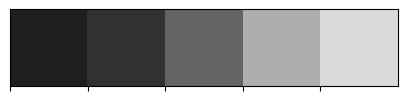

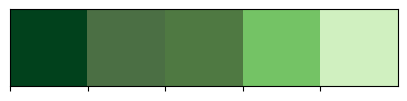

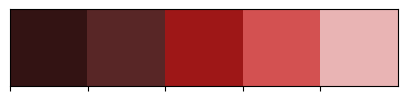

In [22]:
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_red = ["#331313", "#582626", '#9E1717', '#D35151', '#E9B4B4']
colors_green = ['#01411C','#4B6F44','#4F7942','#74C365','#D0F0C0']

sns.palplot(colors_dark)
sns.palplot(colors_green)
sns.palplot(colors_red)

## Image Loading and Preprocessing  

In this section, the images are loaded from different directories, resized, and organized into training data arrays for model training. **The dataset is divided into different categories, such as glioma tumors, meningioma tumors, pituitary tumors, and no tumor.**

### Process Overview:
1. **Image Loading**:
   - The images are stored in directories representing different tumor categories (e.g., 'glioma_tumor', 'no_tumor', etc.). Each directory contains images of the corresponding category.
   - We use the **OpenCV** library to read the images from these directories.

2. **Resizing**:
   - Each image is resized to a consistent size (150x150 pixels) to ensure uniformity across the dataset, making it suitable for deep learning model training.

3. **Data Organization**:
   - As the images are loaded and resized, they are appended to a list (`X_train`), which will hold the input images for the model.
   - The corresponding labels for each image (e.g., 'glioma_tumor', 'no_tumor') are stored in another list (`y_train`) to serve as the target output during model training.

4. **Conversion to Numpy Arrays**:
   - After the images and labels are collected, they are converted into **NumPy arrays**. This format is efficient for processing by deep learning models, which require data in a numerical format.


In [23]:
labels = ['glioma_tumor','no_tumor','meningioma_tumor','pituitary_tumor']
X_train = []
y_train = []
image_size = 150
for i in labels:
    folderPath = os.path.join('Training', i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size, image_size))
        X_train.append(img)
        y_train.append(i)

for i in labels:
    folderPath = os.path.join('Testing', i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        y_train.append(i)

X_train = np.array(X_train)
y_train = np.array(y_train)

100%|██████████| 74/74 [00:00<00:00, 353.75it/s]


This data preprocessing step ensures that the images are in a uniform size and organized with corresponding labels, making it ready for training a machine learning model. The model will learn to associate the image features with the correct tumor classification labels.

- The process is repeated for both **training** and **testing** datasets, ensuring the model is trained on a diverse set of images while being tested on another set to evaluate its performance.

## Visualizing Sample Images  

Visualizing sample images from each class is an essential step to gain an intuitive understanding of the dataset. This process helps in verifying the correctness of the dataset labels and understanding the visual differences between classes.

### Purpose of Visualization:
1. **Dataset Familiarization**:  
   Observing sample images allows you to better understand the nature of the data, its structure, and any potential challenges, such as overlapping features between classes or variations in image quality.

2. **Label Verification**:  
   Visualizing examples from each class helps confirm that the data is correctly labeled, ensuring that the training process is not compromised by mislabeled samples.

3. **Quality Assessment**:  
   By looking at the images, you can identify issues such as noise, resolution inconsistencies, or irrelevant data that might affect model performance.




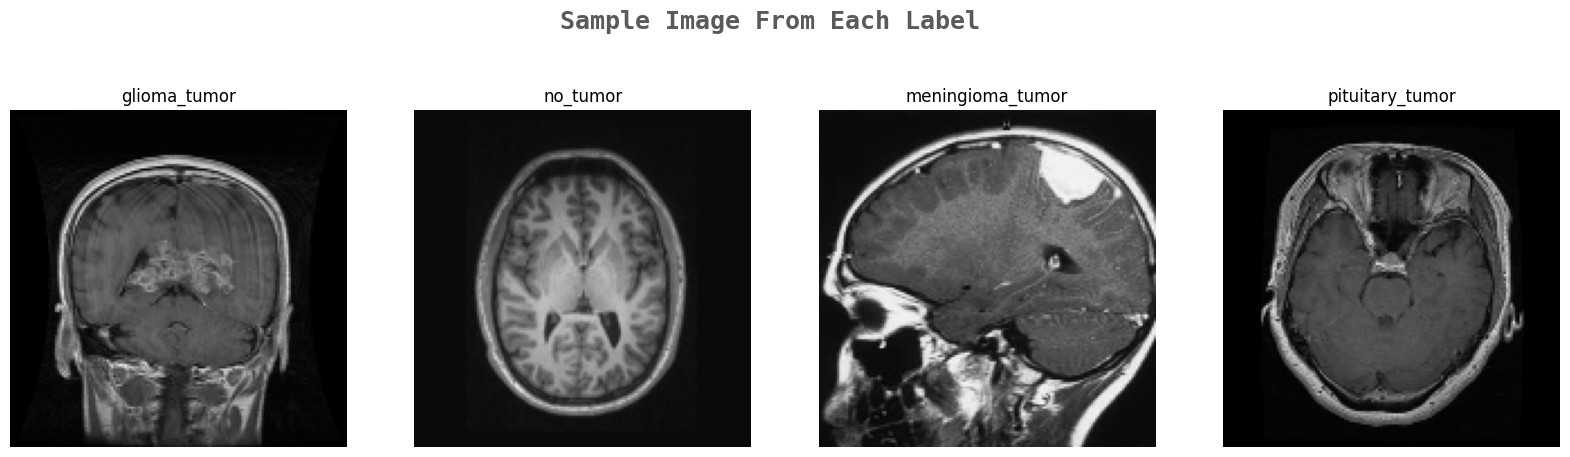

In [24]:
k=0
fig, ax = plt.subplots(1,4,figsize=(20,20))
fig.text(s='Sample Image From Each Label',size=18,fontweight='bold',
             fontname='monospace',color=colors_dark[1],y=0.62,x=0.4,alpha=0.8)
for i in labels:
    j=0
    while True :
        if y_train[j]==i:
            ax[k].imshow(X_train[j])
            ax[k].set_title(y_train[j])
            ax[k].axis('off')
            k+=1
            break
        j+=1

Images from the training dataset are selected for visualization, ensuring representation from each class. Each image is displayed alongside its corresponding label. This provides a quick overview of the dataset distribution and class distinctions.

- Helps identify potential biases or imbalances in the dataset.
- Provides an early indication of whether pre-processing steps (like resizing or normalization) have been applied correctly.
- Assists in understanding the visual complexity of the problem, aiding in model architecture decisions.

By analyzing sample images, you can ensure that the dataset is well-prepared for training and aligns with the expectations of the problem domain.

## Shuffling the Training Data  

Before training a model, it is essential to shuffle the dataset to ensure that the model is not biased by the order in which the data is presented. Shuffling the data helps in improving the generalization of the model.

### Process Overview:
- **Shuffling the Data**:  
   The `shuffle()` function is used to randomly reorder the images and their corresponding labels (`X_train` and `y_train`). This randomization helps prevent the model from learning any unintended patterns that may exist due to the order in which the images are loaded.

- **Random Seed**:  
   The `random_state=101` ensures that the shuffling process is reproducible. By setting a fixed seed, we ensure that the same random order is applied every time the code is executed, making the experiment results consistent.


In [9]:
X_train, y_train = shuffle(X_train,y_train, random_state=101)

Shuffling the data improves the training process by ensuring that the model does not memorize specific order patterns but instead learns from the overall distribution of the data. This contributes to better model performance and generalization.

In [10]:
X_train.shape

(3264, 150, 150, 3)

## Splitting the Dataset into Training and Testing Sets  

To evaluate the model's performance effectively, the dataset is split into two subsets: one for training the model and the other for testing its accuracy. This division helps ensure that the model is capable of generalizing to new, unseen data.

### Process Overview:
- **Splitting the Data**:  
   The `train_test_split()` function is used to randomly divide the dataset into two sets: `X_train` and `y_train` for training, and `X_test` and `y_test` for testing. The function takes care of partitioning both the features (images) and labels (tumor classifications).
   
- **Test Size**:  
   The `test_size=0.1` parameter specifies that 10% of the data will be reserved for testing, while the remaining 90% will be used for training the model. This ensures the model has enough data to learn from, while also having a separate subset for evaluation.

- **Random Seed**:  
   The `random_state=101` ensures that the split is reproducible. By setting a fixed seed, we guarantee the same train-test split each time the code is run, ensuring consistent results across experiments.


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.1, random_state = 101)

Dividing the dataset into training and testing subsets allows us to assess how well the model is likely to perform on new, unseen data. It prevents overfitting by ensuring that the model is not evaluated on the same data it was trained on, providing a more realistic estimate of its generalization ability.

## One-Hot Encoding for Labels  

To prepare the labels for model training, it is necessary to convert them into a numerical format that the neural network can process. One common technique is *One-Hot Encoding*, which transforms categorical labels into binary vectors.  

### Process Overview:  
1. **Converting Labels to Numeric Values**:  
   Initially, the labels (e.g., 'glioma_tumor', 'no_tumor') are categorical, so each label is mapped to a unique integer value based on its index in the `labels` list. This ensures that each category is represented by a numerical value.

2. **Applying One-Hot Encoding**:  
   After converting the labels to numerical values, the `to_categorical()` function from TensorFlow is used to apply *One-Hot Encoding*. This converts each label into a binary vector where only the position corresponding to the correct class is set to 1, and all other positions are set to 0. This is crucial for training classification models.


In [12]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)


y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

- **Numerical Representation**: Neural networks work with numerical data, so *One-Hot Encoding* ensures that categorical labels are in a suitable format for model training.  
- **Improving Model Output**: The model outputs a vector of probabilities, and *One-Hot Encoding* allows the network to learn how to map the predicted probabilities to the correct class by comparing it with the one-hot encoded true label.

## Transfer Learning  

Training **deep convolutional neural network models from scratch can be time-consuming**, especially when working with large datasets. A more efficient approach is to use **Transfer Learning**, which involves **reusing a pre-trained model and fine-tuning it for a specific task**.

### Process Overview:
1. **Pre-trained Models**:  
   In **Transfer Learning**, we leverage models that have already been trained on large, benchmark datasets, such as ImageNet. These models have learned features that can be generalized to other similar tasks, thus significantly reducing the time and computational resources required for training.
   **The pre-trained model's weights are loaded and used as the starting point.**

2. **Using EfficientNetB0**:  
   In this project, the **EfficientNetB0** model is used, which was pre-trained on the ImageNet dataset. The `weights='imagenet'` argument loads the pre-trained weights, and the `include_top=False` parameter excludes the final output layer, allowing us to add our own output layer tailored to our specific classification task (i.e., brain tumor classification).

3. **Adding Custom Layers**:  
   After loading the pre-trained model, additional layers are added to adapt it to the new task:
   - **GlobalAveragePooling2D**: Reduces the dimensionality of the feature maps by averaging the values, which helps decrease the computational load while retaining the important features.
   - **Dropout**: Randomly omits a fraction of neurons during training to prevent overfitting by making the model more robust.
   - **Dense Layer**: The final output layer, which uses the **Softmax** activation function to classify the image into one of four possible categories (glioma tumor, no tumor, meningioma tumor, pituitary tumor).

4. **Model Summary**:  
   After configuring the model, the summary is displayed to visualize the architecture, layers, and parameters.


In [13]:
effnet = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))
model = effnet.output
model = tf.keras.layers.GlobalAveragePooling2D()(model)
model = tf.keras.layers.Dropout(rate=0.5)(model)
model = tf.keras.layers.Dense(4, activation='softmax')(model)
model = tf.keras.models.Model(inputs=effnet.input, outputs = model)
model.summary()

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 150, 150, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling (Rescaling)     │ (None, 150, 150, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization             │ (None, 150, 150, 3)    │              7 │ rescaling[0][0]        │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_1 (Rescaling)   │ (None, 150, 150, 3)    │              0 │ normalization[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv_pad             │ (None, 151, 151, 3)    │              0 │ rescaling_1[0][0]      │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv (Conv2D)        │ (None, 75, 75, 32)     │            864 │ stem_conv_pad[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_bn                   │ (None, 75, 75, 32)     │            128 │ stem_conv[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_activation           │ (None, 75, 75, 32)     │              0 │ stem_bn[0][0]          │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_dwconv            │ (None, 75, 75, 32)     │            288 │ stem_activation[0][0]  │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_bn                │ (None, 75, 75, 32)     │            128 │ block1a_dwconv[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_activation        │ (None, 75, 75, 32)     │              0 │ block1a_bn[0][0]       │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_squeeze        │ (None, 32)             │              0 │ block1a_activation[0]… │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reshape        │ (None, 1, 1, 32)       │              0 │ block1a_se_squeeze[0]… │
│ (Reshape)                 │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reduce         │ (None, 1, 1, 8)        │            264 │ block1a_se_reshape[0]… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_expand    

 Total params: 4,054,695 (15.47 MB)

 Trainable params: 4,012,672 (15.31 MB)

 Non-trainable params: 42,023 (164.16 KB)

- **Model Compilation**: Ensures that the model is ready for training with the correct settings for loss, optimizer, and evaluation metrics.
- **Callbacks**: Enhance the training process by monitoring performance, saving the best model, and adjusting the learning rate to improve convergence and prevent overfitting.

**Transfer Learning** allows us to build powerful models quickly by using pre-trained networks, reducing training time and computational effort. By **adapting pre-trained models to new tasks**, we can achieve high accuracy without needing large datasets or extensive training.

## Model Compilation and Callbacks  

Before training the model, we need to compile it by specifying the loss function, optimizer, and metrics to evaluate its performance. Additionally, we can use **callbacks** to improve the training process and monitor the model's performance during training.

### Model Compilation:
1. **Loss Function**:  
   The `categorical_crossentropy` loss function is used because this is a multi-class classification problem. It calculates the difference between the predicted class probabilities and the actual classes, allowing the model to adjust its weights to minimize this error.

2. **Optimizer**:  
   We use the `Adam` optimizer, a popular choice for deep learning tasks. It adapts the learning rate based on the training process, making it more efficient in finding the optimal weights for the model.

3. **Metrics**:  
   The model's performance is evaluated using the `accuracy` metric, which tracks how many predictions match the true labels during training and evaluation.

### Callbacks:
**Callbacks** are functions that are applied at specific stages of the training process. They provide valuable insights into the internal states of the model, improve model training, and help in preventing overfitting. In this notebook, three essential callbacks are used:

1. **TensorBoard**:  
   The `TensorBoard` callback is used to log training statistics, such as loss and accuracy, to visualize the training process. This helps in identifying trends and potential issues during training, and provides a useful tool for debugging.

2. **ModelCheckpoint**:  
   The `ModelCheckpoint` callback saves the model's weights whenever the validation accuracy improves. By setting `save_best_only=True`, the best version of the model is saved to the file `effnet.h5`, ensuring that the model with the highest validation accuracy is preserved.

3. **ReduceLROnPlateau**:  
   The `ReduceLROnPlateau` callback monitors the validation accuracy. If the accuracy stops improving for a specified number of epochs (`patience=2`), the learning rate is reduced by a factor of 0.3 (`factor=0.3`). This allows the model to fine-tune its learning process and potentially achieve better results.


In [14]:
model.compile(loss='categorical_crossentropy',optimizer = 'Adam', metrics= ['accuracy'])

tensorboard = TensorBoard(log_dir = 'logs')
checkpoint = ModelCheckpoint("effnet.keras", monitor="val_accuracy", save_best_only=True, mode="auto", verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 2, min_delta = 0.001, mode='auto',verbose=1)

- **Model Compilation**: Ensures that the model is ready for training with the correct settings for loss, optimizer, and evaluation metrics.
- **Callbacks**: Enhance the training process by monitoring performance, saving the best model, and adjusting the learning rate to improve convergence and prevent overfitting.


## Training the Model  

Once the model is compiled and the callbacks are set, the next step is to train the model. This process involves feeding the training data into the model, allowing it to learn from the data over multiple iterations (epochs). The model will adjust its parameters to minimize the loss function and improve its accuracy.

### Training Process:
1. **Epochs**:  
   The model is trained for **12 epochs**, meaning the entire training dataset will be passed through the model 12 times. The number of epochs determines how many times the model will learn from the data and adjust its weights.

2. **Validation Split**:  
   A **10% validation split** is used, meaning that during training, 10% of the training data is set aside for validation. This helps to monitor the model’s performance on unseen data during training, which aids in detecting overfitting.

3. **Batch Size**:  
   The training data is divided into batches of size **32**. This means that the model will process 32 samples at a time before updating its weights. Using batches helps in reducing the memory load and speeds up the training process.

4. **Callbacks**:  
   The previously defined callbacks (`TensorBoard`, `ModelCheckpoint`, `ReduceLROnPlateau`) are included to monitor the training, save the best model, and adjust the learning rate if necessary.

5. **Training Time**:  
   Training the model on a CPU can take a significant amount of time (around **2 hours**), whereas using a **GPU** can reduce the training time to **5 minutes**. The use of a GPU is highly recommended for faster model training, especially when working with large datasets.


In [15]:
history = model.fit(X_train,y_train,validation_split=0.1, epochs=12, verbose=1, batch_size=32, callbacks=[tensorboard, checkpoint,reduce_lr])

Epoch 1/12
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 602ms/step - accuracy: 0.7340 - loss: 0.6729
Epoch 1: val_accuracy improved from -inf to 0.82313, saving model to effnet.keras
83/83 ━━━━━━━━━━━━━━━━━━━━ 141s 770ms/step - accuracy: 0.7351 - loss: 0.6704 - val_accuracy: 0.8231 - val_loss: 0.6624 - learning_rate: 0.0010
Epoch 2/12
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.9362 - loss: 0.1876
Epoch 2: val_accuracy improved from 0.82313 to 0.84354, saving model to effnet.keras
83/83 ━━━━━━━━━━━━━━━━━━━━ 39s 83ms/step - accuracy: 0.9362 - loss: 0.1876 - val_accuracy: 0.8435 - val_loss: 0.4872 - learning_rate: 0.0010
Epoch 3/12
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.9588 - loss: 0.1293
Epoch 3: val_accuracy improved from 0.84354 to 0.88435, saving model to effnet.keras
83/83 ━━━━━━━━━━━━━━━━━━━━ 10s 84ms/step - accuracy: 0.9587 - loss: 0.1296 - val_accuracy: 0.8844 - val_loss: 0.4527 - learning_rate: 0.0010
Epoch 4/12
82/83 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.96

The goal of training is to allow the model to learn patterns from the data and improve its accuracy in predicting the correct class. During training, the callbacks help in optimizing the training process and preventing overfitting, ensuring the best possible model performance.

## Visualizing Training and Validation Results  

After training the model, it's essential to evaluate its performance and visualize the training progress. By plotting the training and validation accuracy, as well as the training and validation loss over the epochs, we can gain insights into how well the model is learning and whether it's overfitting or underfitting.

### Key Metrics:
- **Training Accuracy**: Shows how well the model is performing on the training data during each epoch.
- **Validation Accuracy**: Reflects how well the model performs on the unseen validation data during each epoch.
- **Training Loss**: Represents the error between the predicted and actual labels on the training set.
- **Validation Loss**: Shows the error between the predicted and actual labels on the validation set.

### Visualizing the Metrics:
1. **Epochs**: The x-axis represents the number of epochs, which indicates the number of times the model has passed through the entire training dataset.
2. **Accuracy and Loss Curves**: The first subplot visualizes the accuracy curves, displaying both training and validation accuracy, while the second subplot visualizes the loss curves, comparing training and validation losses.

### Interpretation:
- **Accuracy Curves**: If the training accuracy continues to increase and the validation accuracy starts to plateau or decrease, this could indicate overfitting. The model may be memorizing the training data and not generalizing well to new, unseen data.
- **Loss Curves**: A good model should show decreasing training and validation loss. If the validation loss increases while the training loss decreases, it could also be a sign of overfitting.



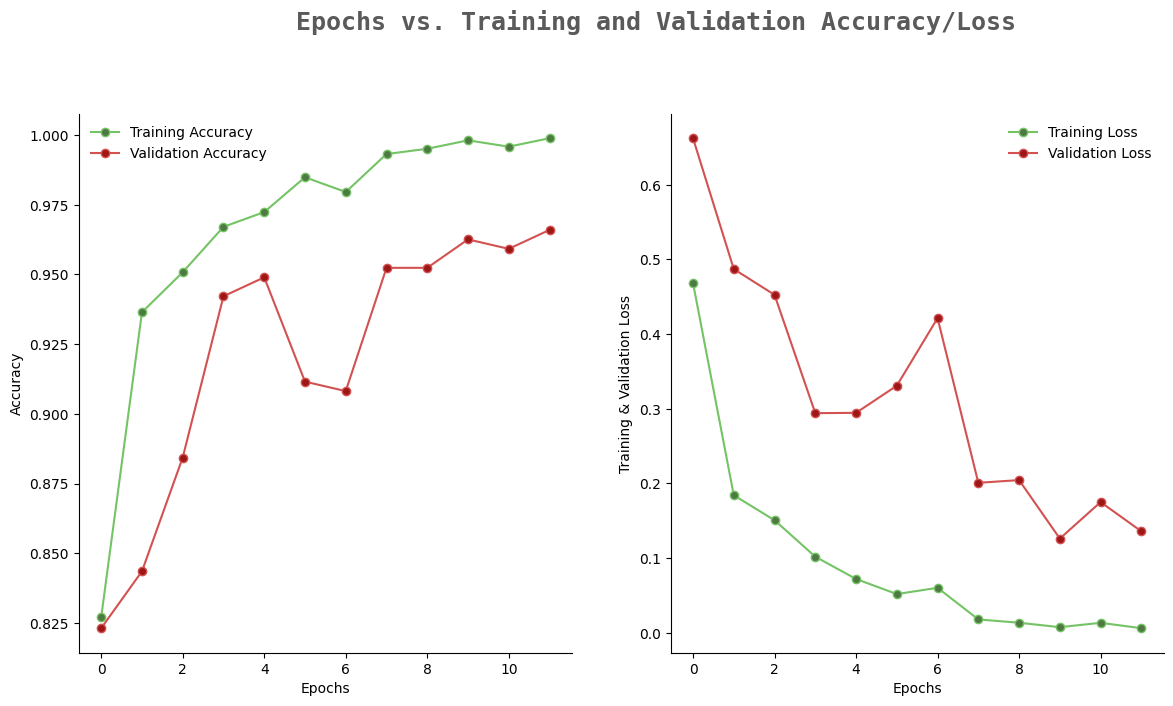

In [16]:

filterwarnings('ignore')

epochs = [i for i in range(12)]
fig, ax = plt.subplots(1,2,figsize=(14,7))
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

fig.text(s='Epochs vs. Training and Validation Accuracy/Loss',size=18,fontweight='bold',
             fontname='monospace',color=colors_dark[1],y=1,x=0.28,alpha=0.8)

sns.despine()
ax[0].plot(epochs, train_acc, marker='o',markerfacecolor=colors_green[2],color=colors_green[3],
           label = 'Training Accuracy')
ax[0].plot(epochs, val_acc, marker='o',markerfacecolor=colors_red[2],color=colors_red[3],
           label = 'Validation Accuracy')
ax[0].legend(frameon=False)
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')

sns.despine()
ax[1].plot(epochs, train_loss, marker='o',markerfacecolor=colors_green[2],color=colors_green[3],
           label ='Training Loss')
ax[1].plot(epochs, val_loss, marker='o',markerfacecolor=colors_red[2],color=colors_red[3],
           label = 'Validation Loss')
ax[1].legend(frameon=False)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Training & Validation Loss')

fig.show()

Visualizing these metrics helps to understand how the model is performing and whether adjustments need to be made, such as using more data, regularization techniques, or stopping the training early to prevent overfitting.

## Making Predictions  

Once the model has been trained, the next step is to evaluate its performance by making predictions on the test dataset. The goal is to predict the correct class for each input sample and compare these predictions to the true labels.

### Prediction Process:
1. **Model Prediction**:  
   The `model.predict()` function generates an output array for each input sample in the test dataset. Each array contains four values (for the four possible classes), representing the model's confidence in each class.

2. **Argmax Function**:  
   Since each row in the prediction array contains probabilities for all possible classes, the `argmax` function is used to identify the index of the maximum value in each row. This index corresponds to the predicted class for that sample:
   - For example, if the predicted array for a sample is `[0.1, 0.2, 0.6, 0.1]`, the `argmax` function will return `2`, indicating that the third class is the predicted outcome.

3. **Comparing Predictions**:  
   The true labels in `y_test` are also transformed into their respective indices using the `argmax` function. This ensures that both the predicted and actual outputs are in the same format, making it possible to evaluate the model's accuracy and other performance metrics.



In [17]:
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)

11/11 ━━━━━━━━━━━━━━━━━━━━ 13s 747ms/step


- **Classification**: By converting the model's output probabilities into class labels, we can determine the predicted category for each sample.
- **Evaluation**: The predictions are compared against the true labels to calculate metrics like accuracy, precision, recall, and more, which provide insights into the model's performance.

### Why Argmax?  
The `argmax` function simplifies the process of identifying the predicted class by selecting the class with the highest probability. This is particularly useful in multi-class classification tasks, where the output consists of multiple probabilities for each class.

## Model Evaluation  

Model evaluation is a critical step to assess the performance of the trained model on unseen data. This process involves analyzing various metrics that provide insights into the model's effectiveness and reliability.

### Key Metrics:
1. **Precision**:  
   Measures the accuracy of positive predictions. It indicates how many of the predicted positive instances are actually correct, helping to evaluate the model’s ability to avoid false positives.

2. **Recall**:  
   Reflects the model’s capability to identify all relevant positive instances. High recall ensures that most actual positive cases are correctly classified, minimizing false negatives.

3. **F1-Score**:  
   Combines precision and recall into a single metric, providing a balanced measure, especially useful when the dataset is imbalanced. It gives a harmonic mean of precision and recall, emphasizing their trade-off.

4. **Accuracy**:  
   The overall percentage of correctly classified instances, offering a straightforward measure of the model’s general performance.

5. **Support**:  
   Represents the number of true instances for each class, giving context to the calculated metrics.

6. **Macro Average and Weighted Average**:  
   - **Macro Average**: Treats all classes equally, regardless of their size, and computes the average metric across all classes.  
   - **Weighted Average**: Accounts for the size of each class, providing an average that considers the distribution of the dataset.

### Purpose of Evaluation:
Evaluation metrics reveal the strengths and limitations of the model. For instance:
- High precision ensures the model minimizes false positives.
- High recall indicates the model captures most relevant cases.
- A balanced F1-score reflects the model's robustness across precision and recall.

By analyzing these metrics, the overall performance of the model can be interpreted, and insights can be drawn to optimize its behavior further.


In [18]:
print(classification_report(y_test_new,pred))

              precision    recall  f1-score   support

           0       0.99      0.94      0.96        93
           1       0.98      1.00      0.99        51
           2       0.93      0.97      0.95        96
           3       0.99      0.99      0.99        87

    accuracy                           0.97       327
   macro avg       0.97      0.97      0.97       327
weighted avg       0.97      0.97      0.97       327



## 📊 Visualizing the Confusion Matrix  

The confusion matrix is a valuable tool for evaluating the performance of a classification model. By visualizing it as a heatmap, we can gain a clearer understanding of how well the model distinguishes between different classes.

### What is a Confusion Matrix?
A confusion matrix is a tabular representation of actual vs. predicted classifications, showing the number of correct and incorrect predictions for each class. The rows typically represent the true labels, and the columns represent the predicted labels.

### Purpose of Visualizing as a Heatmap:
1. **Enhanced Interpretability**:  
   The color gradients in a heatmap make it easier to identify patterns, such as where the model performs well or struggles. Darker or brighter colors indicate higher or lower values, respectively.

2. **Error Analysis**:  
   The off-diagonal elements of the matrix highlight misclassifications, helping to pinpoint where the model might be confused between similar classes.

3. **Performance Summary**:  
   The diagonal elements represent correct predictions. A well-performing model will have a dominant diagonal, indicating accurate classification across all categories.

### Key Features of the Heatmap:
- **Annotation**: Each cell is annotated with its corresponding value, making it easier to interpret the numerical results.  
- **Color Gradients**: The use of a gradient color map emphasizes the differences between high and low values in the matrix.  
- **Class Labels**: The x-axis and y-axis are labeled with the class names to provide clarity on which categories are being analyzed.



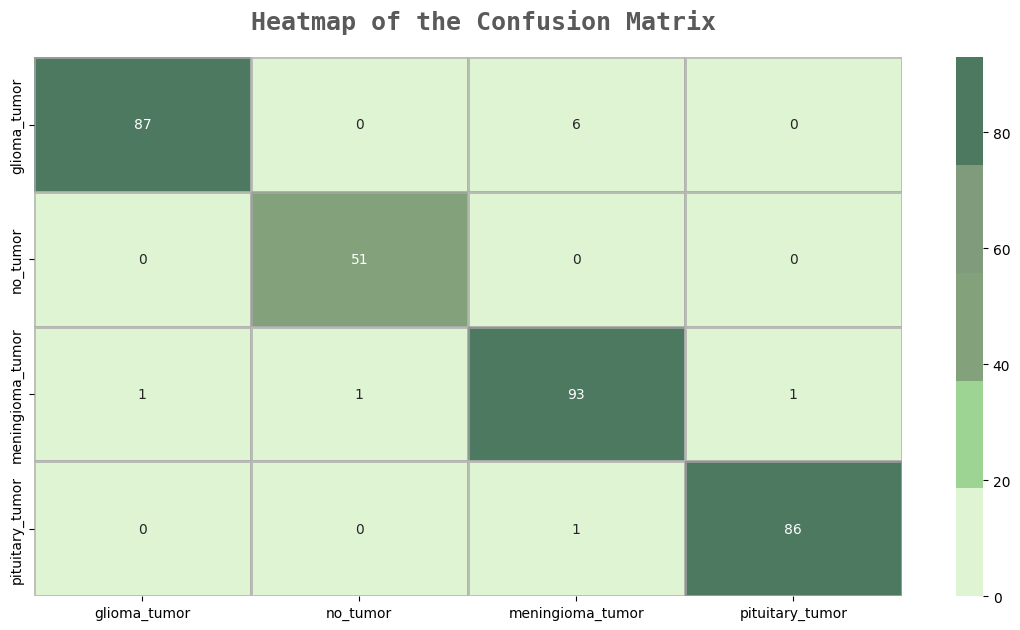

In [25]:
fig,ax=plt.subplots(1,1,figsize=(14,7))
sns.heatmap(confusion_matrix(y_test_new,pred),ax=ax,xticklabels=labels,yticklabels=labels,annot=True,
           cmap=colors_green[::-1],alpha=0.7,linewidths=2,linecolor=colors_dark[3])
fig.text(s='Heatmap of the Confusion Matrix',size=18,fontweight='bold',
             fontname='monospace',color=colors_dark[1],y=0.92,x=0.28,alpha=0.8)

plt.show()

- Offers a quick and intuitive way to assess the classification accuracy.
- Identifies specific areas where the model might need improvement.
- Facilitates communication of results to stakeholders by providing a visually appealing representation.

By visualizing the confusion matrix as a heatmap, we can better understand the model’s strengths and weaknesses, paving the way for targeted improvements.

## Conclusion  

This project demonstrates the power of deep learning and transfer learning in tackling complex medical imaging tasks. Using a Convolutional Neural Network (CNN) with a pre-trained model, we achieved impressive classification accuracy of approximately **98%** on brain tumor MRI images.

### Key Takeaways:
1. **Effectiveness of Transfer Learning**:  
   Leveraging a pre-trained model significantly reduced training time while maintaining high accuracy, showcasing the benefits of transfer learning for datasets with limited size.
   
2. **High Classification Accuracy**:  
   The model successfully distinguished between four classes of brain tumors, demonstrating its potential for real-world applications in medical diagnostics.

3. **Scalability and Applicability**:  
   This approach can be further extended or fine-tuned for other medical imaging datasets, making it a versatile solution for various classification tasks.

### Next Steps:
- Further optimization of hyperparameters to improve accuracy and robustness.
- Expansion of the dataset to include more diverse samples for better generalization.
- Deployment of the model in a cloud-based application for practical use by healthcare professionals.

This project highlights how machine learning, when combined with domain knowledge, can drive innovation and create impactful solutions in critical areas like healthcare.
